Load dataloader and embeddings.

In [13]:
import torch

# dataloader = torch.load('data/dataloader.pth')
embeddings = torch.load('../data/embeddings.pt', map_location=torch.device('cpu'))
embeddings = embeddings.squeeze().numpy()

print('Shape of embeddings:', embeddings.shape)

Shape of embeddings: (48669, 256)


Apply PCA first to reduce dimensionality.

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)

embeddings_pca = pca.fit_transform(embeddings)

print('Explained variance ratio:', sum(pca.explained_variance_ratio_))

print('Shape of PCA-projected embeddings:', embeddings_pca.shape)

Explained variance ratio: 0.9998607559191555
Shape of PCA-projected embeddings: (48669, 32)


Apply t-SNE on the PCA projection for 2D visualization.

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30)
embeddings_tsne = tsne.fit_transform(embeddings_pca)

print('KL divergence', tsne.kl_divergence_)
print('Shape of tSNE:', embeddings_tsne.shape)

KL divergence 0.09503761678934097
Shape of tSNE: (48669, 2)


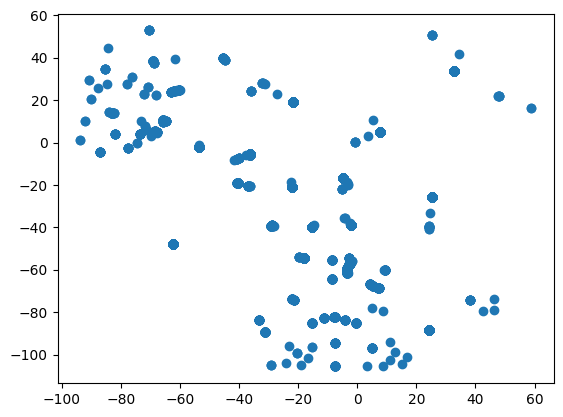

In [25]:
import matplotlib.pyplot as plt

plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1])
plt.show()